In [1]:
# This is a pipeline to visualize and analyze the results of CellProfiler on RNAprobe experiments

In [2]:
# Import stuff
import os
from utils import data_reader
from utils import plot_utils
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


In [3]:
# Select the path where the data is (the output of CellProfiler)
CPoutput_path = '/mnt/c/Users/herny/Desktop/SWC/Data/Pdym_cell_types/RNAscope/Quantification/2018-05-16/' 

In [4]:
# Import the data
# Name of the output file
nuc_file = 'Nuclei.csv'
# Read it in a useful format
CPdata = data_reader.data_reader(CPoutput_path+nuc_file)

In [5]:
# Check data structure
CPdata.head()

,ObjectNumber,Children_FinalDots_C2_Count,Children_FinalDots_C3_Count,Location_Center_X,Location_Center_Y
0,1,0,0,2931.442259,29.689086
1,2,0,0,3142.045202,37.845619
2,3,21,2,3397.909943,35.823569
3,4,1,3,2235.929835,50.935083
4,5,2,32,2799.782517,42.244217


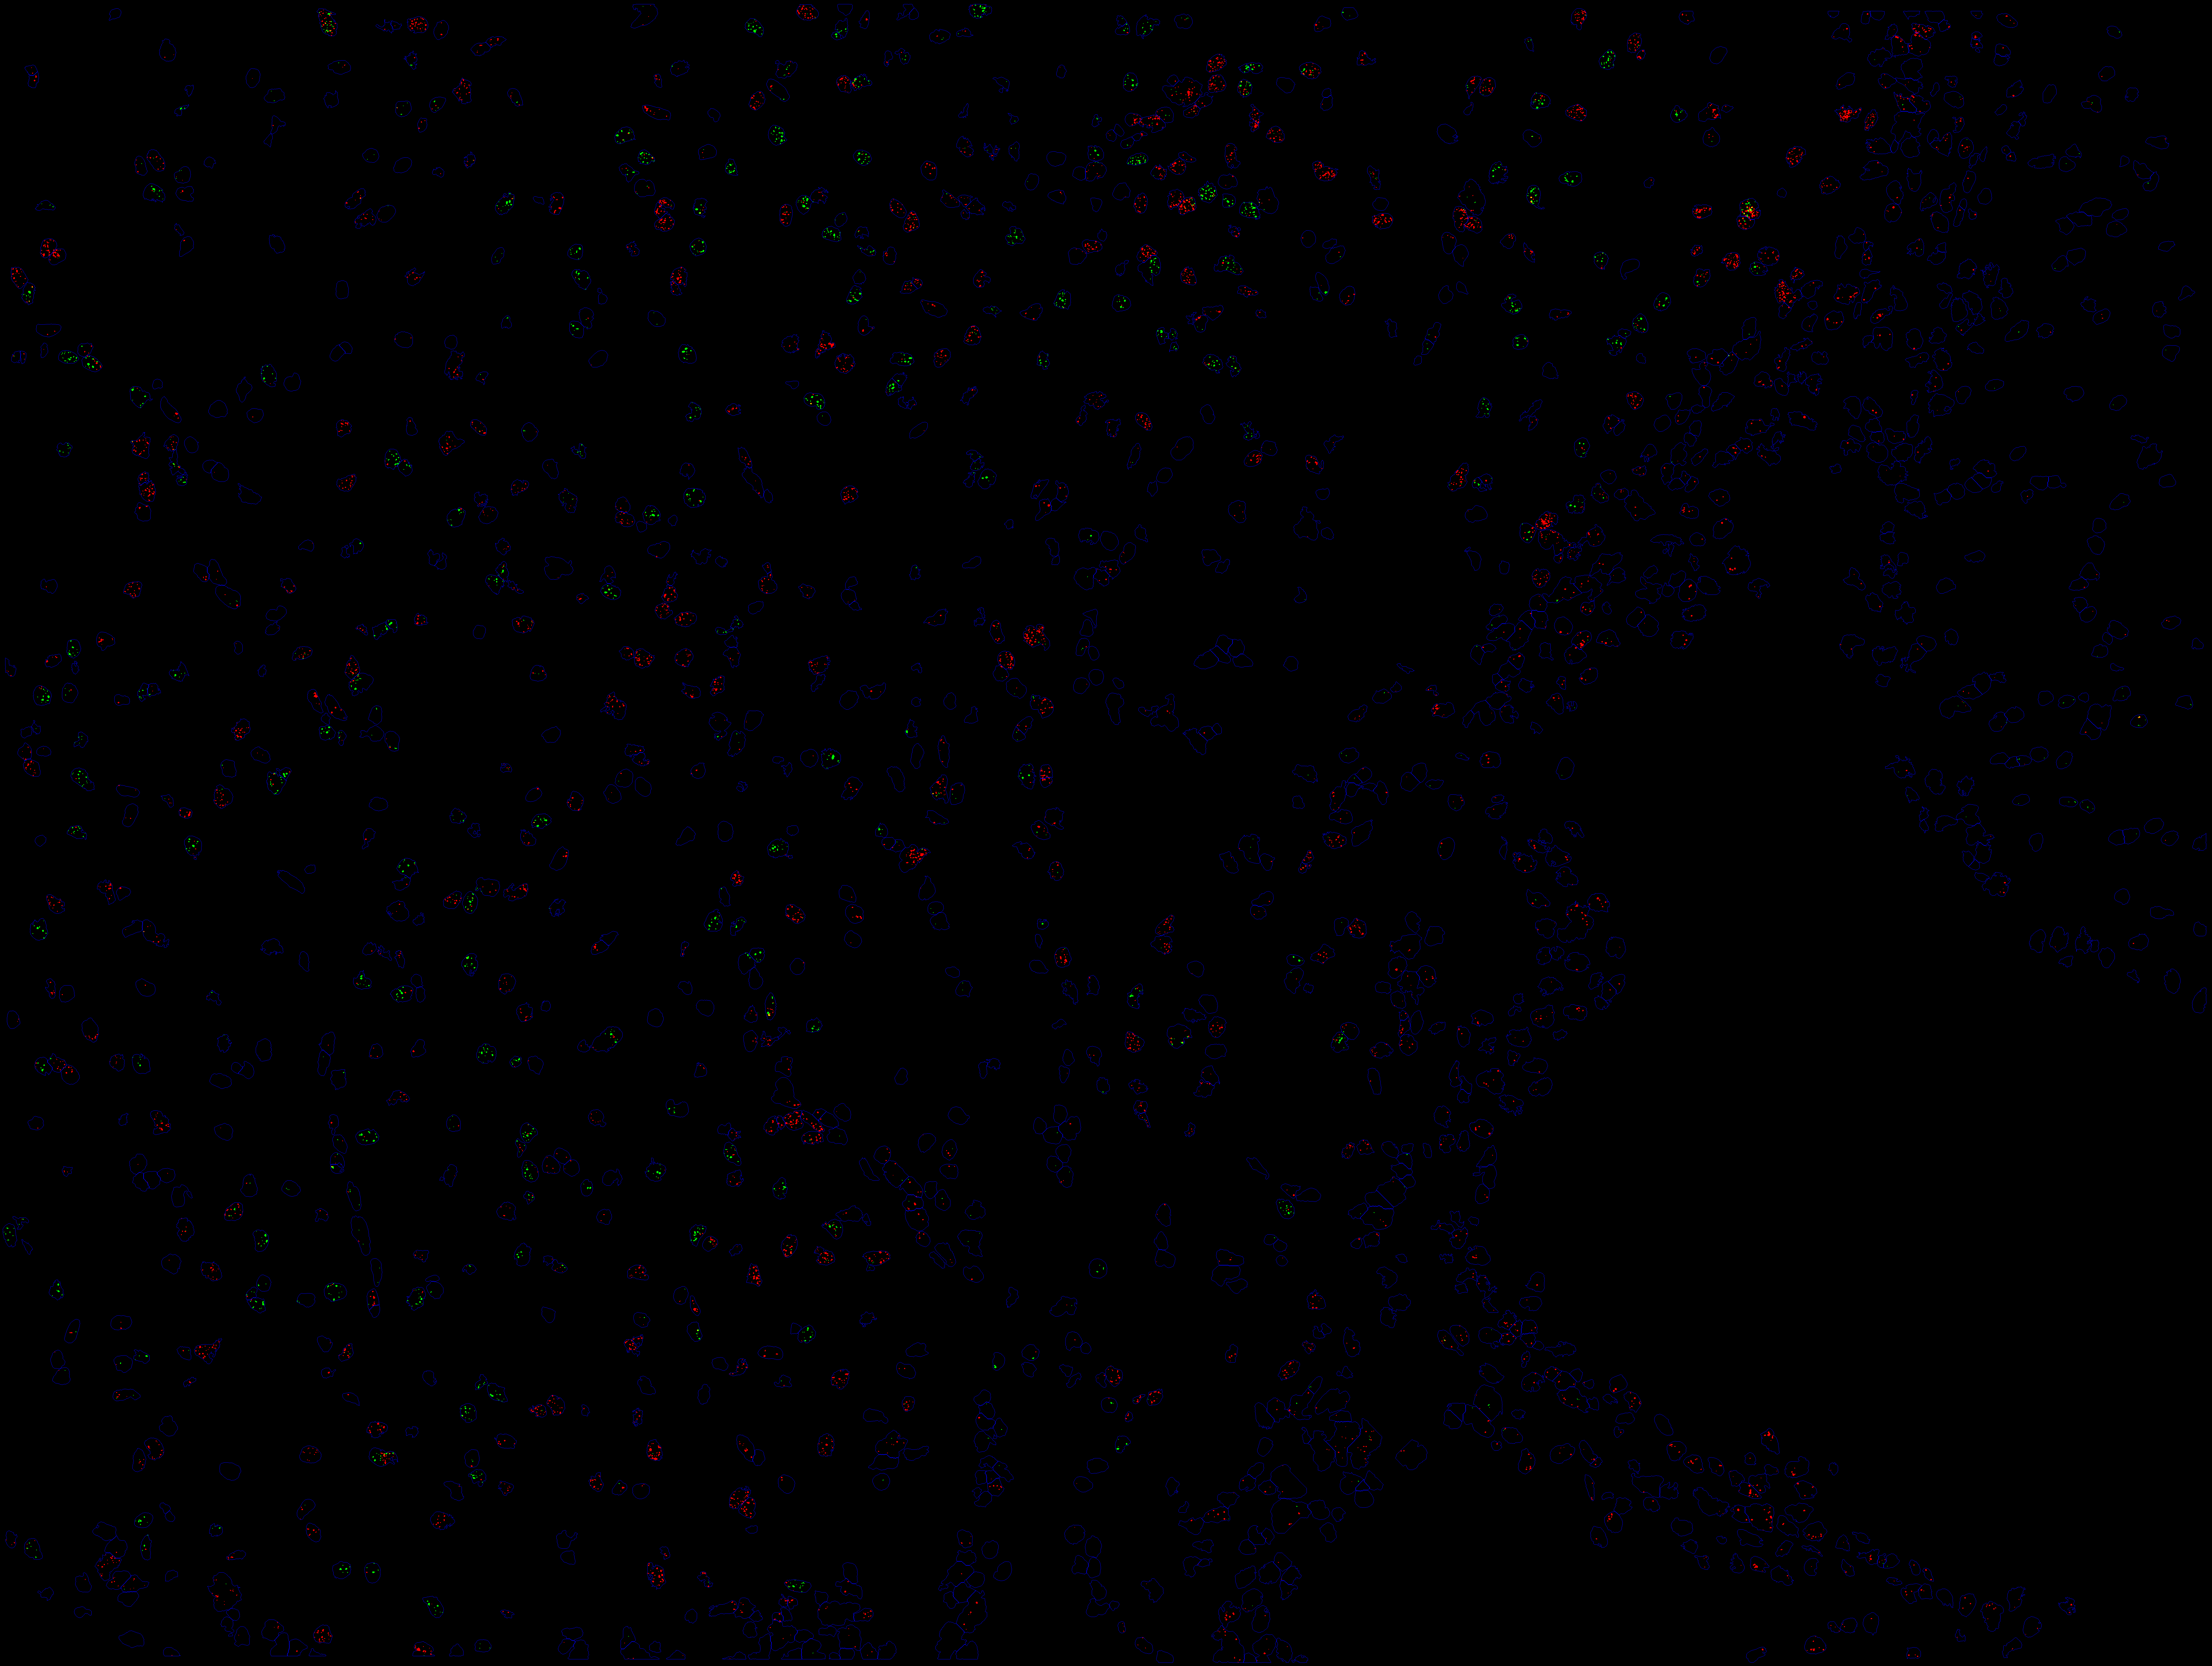

In [6]:
# Look at CellProfiler image output
CPout_image_name = 'ResultOverlay.tiff'
img = Image.open(CPoutput_path+CPout_image_name)
img

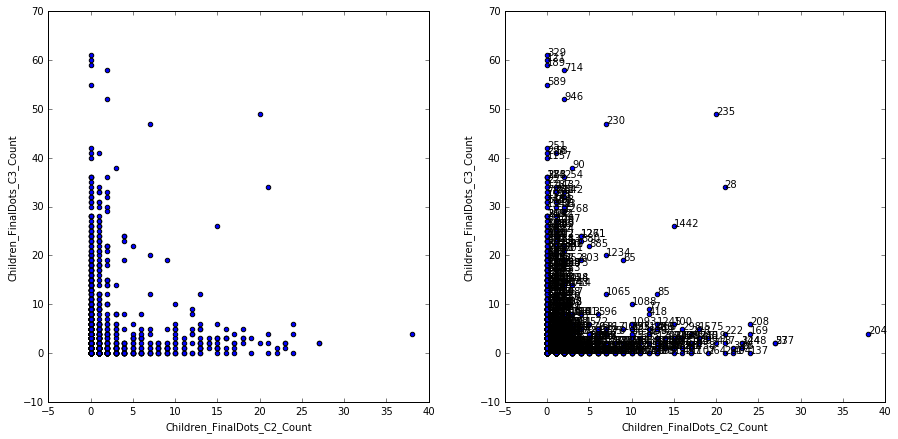

In [7]:
# plot the data
%matplotlib inline
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,7))
CPdata.plot.scatter(1,2, ax = ax)
ax3 = CPdata.plot('Children_FinalDots_C2_Count', 'Children_FinalDots_C3_Count', kind='scatter', ax = ax2)
CPdata[['Children_FinalDots_C2_Count','Children_FinalDots_C3_Count','ObjectNumber']].apply(lambda x: ax3.text(*x),axis=1);

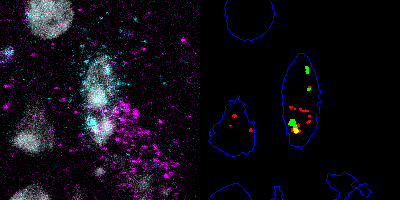

In [13]:
# Show zoomed images (both the original and the processed image) depending on the object selected
Orig_image_name = 'OriginalOverlay.tiff'
img2 = Image.open(CPoutput_path+Orig_image_name)
test = plot_utils.see_object(1065,CPdata,img,img2,100)
test